In [173]:
import pandas as pd
import numpy as np
import seaborn as sns

# Clean Data

In [174]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected stage_train_dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [175]:
raw_data=pd.read_csv("qualite-de-lair-mesuree-dans-la-station-chatelet.csv", sep=';', parse_dates=['DATE/HEURE'])

In [176]:
raw_data['NO'].unique()

array(['ND', '5', '3', '6', '4', '2', '7', '10', '9', '8', '<2', '15',
       '26', '73', '103', '111', '135', '119', '89', '49', '29', '32',
       '34', '59', '43', '87', '46', '18', '11', '31', '45', '44', '12',
       '25', '20', '17', '14', '16', '19', '21', '13', '24', '33', '23',
       '53', '40', '36', '51', '22', '28', '35', '39', '41', '57', '42',
       '30', '70', '58', '38', '27', '69', '62', '37', '84', '86', '76',
       '66', '68', '48', '50', '55', '72', '56', '71', '65', '92', '60',
       '75', '63', '81', '61', '52', '64', '74', '122', '124', '91',
       '157', '85', '110', '120', '125', '113', '77', '54', '80', '101',
       '144', '115', '114', '175', '199', '198', '212', '221', '186',
       '165', '164', '112', '107', '141', '90', '104', '94', '99', '98',
       '129', '131', '128', '67', '47', '118', '79', '106', '83', '88',
       '82', '96', '179', '183', '78', '97', '253', '274', '189', '162',
       '150', '143', '146', '140', '148', '138', '166', '156', 

In [177]:
raw_data['NO2'].unique()

array(['ND', '7', '23', '32', '28', '18', '15', '16', '14', '11', '8',
       '9', '13', '20', '31', '2', '4', '17', '25', '10', '12', '3', '6',
       '<2', '5', '19', '50', '52', '70', '37', '47', '49', '43', '54',
       '75', '74', '66', '62', '53', '56', '57', '64', '69', '77', '80',
       '89', '84', '63', '24', '60', '51', '46', '33', '22', '26', '30',
       '42', '38', '40', '27', '34', '41', '36', '29', '21', '45', '44',
       '35', '39', '58', '65', '72', '88', '48', '59', '61', '55', '71',
       '67', '73', '68', '100', '92', '97', '91', '85', '83', '82', '93',
       '87', '76', '79', '81', '78', '103', '129', '223', '151', '107',
       '117', '131', '137', '139', '96', '90', '132', '133', '115', '109',
       '111', '94', '95', '105', '99', '101', '86', '108', '113', '98',
       nan, '165', '110', '162', '178', '150', '125', '152', '360', '104',
       '326', '160', '118', '126', '138', '130', '127', '112', '119',
       '123', '114', '102', '106', '166'], dtype=obje

In [178]:
raw_data['CO2'].unique()

array(['508', '529', '547', '614', '637', '646', '620', '625', '578',
       '562', '564', '524', '455', '451', '473', '461', '441', '437',
       '457', '467', '505', '528', '553', '558', '679', '712', '694',
       '736', '609', '628', '580', '509', '476', '464', '448', '439',
       '431', '436', '443', '489', '519', '533', '541', '556', '671',
       '726', '791', '849', '713', '663', '577', '595', '600', 'ND',
       '682', '598', '542', '499', '488', '501', '497', '538', '534',
       '548', '554', '706', '813', '788', '653', '636', '572', '520',
       '517', '630', '618', '530', '430', '414', '418', '762', '639',
       '563', '570', '523', '559', '438', '447', '452', '496', '745',
       '766', '783', '666', '608', '616', '588', '613', '669', '711',
       '583', '507', '459', '445', '454', '471', '514', '658', '765',
       '719', '728', '635', '599', '604', '485', '425', '426', '434',
       '539', '555', '772', '790', '733', '710', '611', '568', '615',
       '631', '512', 

In [179]:
raw_data['PM10'].unique()

array(['43', '45', '42', '59', '65', '63', '83', '33', '29', '18', '10',
       '8', '12', '5', '9', '17', '20', '32', '52', '58', '62', '47',
       '56', '46', '41', '38', '34', '27', '23', '13', '24', '39', '49',
       '69', '72', '71', '55', '48', '61', '68', '22', '26', '60', '70',
       '76', '53', '44', '51', '75', '37', '28', 'ND', '78', '54', '<5',
       '11', '140', '144', '30', '36', '66', '50', '15', '16', '100',
       '21', '25', '64', '40', '19', '87', '6', '98', '57', '14', '67',
       '124', '97', '7', '31', '74', '80', '79', '81', '77', '73', '92',
       '82', '84', '35', '88', '85', '114', '86', '107', '104', '91',
       '89', '101', '146', '93', '135', '90', '103', '96', '95', '106',
       '110', '108', '94', '111', '133', '223', '127', '118', '137',
       '123', '109', '115', '763', '142', '117', '134', '102', '119',
       '>1000', '148', '143', '150', '125', '129', '99', '128', '112',
       '120', '121', '113', '116', '147', '126', '152', '210', '176',
 

In [180]:
raw_data['DATE/HEURE'].unique()

array([datetime.datetime(2022, 10, 10, 2, 0, tzinfo=tzoffset(None, 7200)),
       datetime.datetime(2022, 10, 10, 1, 0, tzinfo=tzoffset(None, 7200)),
       datetime.datetime(2022, 10, 10, 0, 0, tzinfo=tzoffset(None, 7200)),
       ...,
       datetime.datetime(2013, 1, 1, 4, 0, tzinfo=tzoffset(None, 3600)),
       datetime.datetime(2013, 1, 1, 3, 0, tzinfo=tzoffset(None, 3600)),
       datetime.datetime(2013, 1, 1, 2, 0, tzinfo=tzoffset(None, 3600))],
      dtype=object)

In [181]:
raw_data['TEMP'].unique()

array(['18,2', '18,5', '18,8', '19,1', '19,4', '19,5', '19,2', '18,3',
       '18', '18,9', '18,6', '17,8', '17,2', '17,3', '17,4', '18,4',
       '18,7', '19', '19,6', '19,7', '19,8', '19,9', '17,7', '17,5',
       '17,9', '20,3', '20,5', '17,1', '19,3', '20,2', '20,4', '20,1',
       '17,6', 'ND', '22,4', '22,3', '21,7', '21,5', '21', '20,6', '21,6',
       '21,3', '20,7', '17', '21,2', '20,9', '18,1', '20', '20,8', '21,1',
       '21,4', '21,8', '23,2', '23,3', '23', '22,7', '23,8', '23,4',
       '23,1', '22,8', '22,5', '22,6', '22,1', '22', '22,9', '23,6',
       '24,1', '24,3', '24,4', '25,8', '25,4', '25,2', '24,7', '24,2',
       '24', '23,7', '23,5', '23,9', '24,6', '25', '24,9', '22,2', '24,8',
       '25,3', '21,9', '24,5', '25,1', '26,1', '25,6', '26', '25,7',
       '25,5', '25,9', '26,3', '26,6', '26,8', '26,7', '26,4', '26,9',
       '26,5', '26,2', '27', '27,1', '27,2', '27,7', '27,9', '28', '27,4',
       '27,5', '27,3', '27,8', '27,6', '28,2', '28,1', '16,5', '16,2',


In [182]:
cleaned_data = raw_data.replace('ND', np.nan)
cleaned_data['TEMP'] = cleaned_data['TEMP'].str.replace(',', '.')
cleaned_data['HUMI'] = cleaned_data['HUMI'].str.replace(',', '.')
# we just drop the < / > signs, because we have no indication what this means
cleaned_data = cleaned_data.replace(to_replace=[r'<',r'>'], value='', regex=True)

In [183]:
cleaned_data.head()
cleaned_data.to_csv('test')

In [184]:
cleaned_data[['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']] = cleaned_data[['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']].apply(pd.to_numeric)

#### DATE / TIME

In [185]:
cleaned_data['DATE'] = pd.to_datetime(cleaned_data['DATE/HEURE'], utc=True)
cleaned_data = cleaned_data.drop(columns=['DATE/HEURE'])
cleaned_data.head()

,NO,NO2,PM10,CO2,TEMP,HUMI,DATE
0,NaN,NaN,43.0,508.0,18.2,49.1,2022-10-10 00:00:00+00:00
1,NaN,NaN,45.0,529.0,18.5,48.4,2022-10-09 23:00:00+00:00
2,NaN,NaN,42.0,547.0,18.8,47.1,2022-10-09 22:00:00+00:00
3,NaN,NaN,59.0,614.0,19.1,47.2,2022-10-09 21:00:00+00:00
4,NaN,NaN,65.0,637.0,19.4,46.3,2022-10-09 20:00:00+00:00


#### Missing Values

In [186]:
missing_values_table(cleaned_data)

Your selected stage_train_dataframe has 7 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
NO,28296,33.1
NO2,19504,22.8
CO2,15722,18.4
PM10,15330,17.9
TEMP,10712,12.5
HUMI,10711,12.5


<AxesSubplot: >

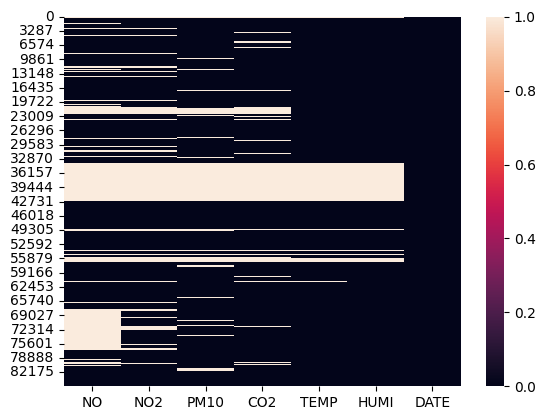

In [187]:
sns.heatmap(cleaned_data.isnull())

Drop rows that do not have any values except datetime

In [188]:
cleaned_data.dropna(thresh=6, inplace=True)

Since we are dealing with chronological data, we will fill the missing values with the ones that happened right before.

In [189]:
cleaned_data.fillna(method='bfill', inplace=True)

In [190]:
missing_values_table(cleaned_data)

Your selected stage_train_dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [191]:
cleaned_data = cleaned_data.set_index('DATE')
# cleaned_data['DATE'] = cleaned_data.index
cleaned_data

,NO,NO2,PM10,CO2,TEMP,HUMI
DATE,,,,,,
2022-09-29 01:00:00+00:00,5.0,7.0,20.0,444.0,18.8,47.6
2022-09-29 00:00:00+00:00,3.0,23.0,11.0,450.0,17.8,50.0
2022-09-28 23:00:00+00:00,6.0,32.0,36.0,491.0,18.0,49.3
2022-09-28 22:00:00+00:00,4.0,28.0,39.0,526.0,18.1,46.8
2022-09-28 21:00:00+00:00,2.0,18.0,36.0,571.0,18.2,43.5
...,...,...,...,...,...,...
2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9
2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8
2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0


In [192]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64698 entries, 2022-09-29 01:00:00+00:00 to 2013-01-01 01:00:00+00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO      64698 non-null  float64
 1   NO2     64698 non-null  float64
 2   PM10    64698 non-null  float64
 3   CO2     64698 non-null  float64
 4   TEMP    64698 non-null  float64
 5   HUMI    64698 non-null  float64
dtypes: float64(6)
memory usage: 3.5 MB


<AxesSubplot: >

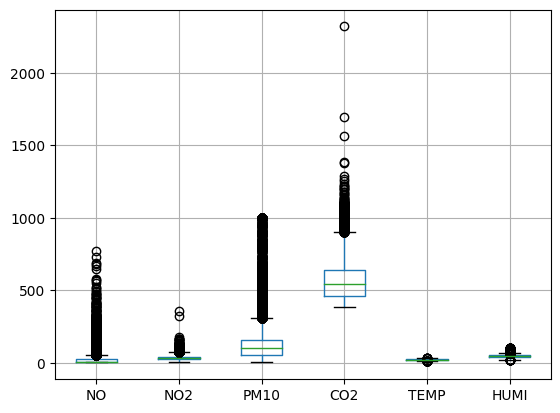

In [193]:
cleaned_data.boxplot()

There are some outliers, but our dataset is very large, so it is not that bad.

In [194]:
cleaned_data['HOUR'] = cleaned_data.index.hour
cleaned_data['MONTH'] = cleaned_data.index.month
cleaned_data['WEEK_OF_YEAR'] = cleaned_data.index.weekofyear
cleaned_data['DAY'] = cleaned_data.index.day
cleaned_data['YEAR'] = cleaned_data.index.year
cleaned_data['WEEKDAY'] = cleaned_data.index.weekday
cleaned_data['WEEKEND']=np.where(cleaned_data.index.weekday > 5, 1, 0)
cleaned_data.tail()

/tmp/ipykernel_5696/3463164452.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  cleaned_data['WEEK_OF_YEAR'] = cleaned_data.index.weekofyear


,NO,NO2,PM10,CO2,TEMP,HUMI,HOUR,MONTH,WEEK_OF_YEAR,DAY,YEAR,WEEKDAY,WEEKEND
DATE,,,,,,,,,,,,,
2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9,5,1,1,1,2013,1,0
2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8,4,1,1,1,2013,1,0
2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0,3,1,1,1,2013,1,0
2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3,2,1,1,1,2013,1,0
2013-01-01 01:00:00+00:00,6.0,31.0,182.0,776.0,21.5,46.2,1,1,1,1,2013,1,0


In [195]:
cleaned_data = cleaned_data.iloc[::-1]

In [196]:
cleaned_data.tail()

,NO,NO2,PM10,CO2,TEMP,HUMI,HOUR,MONTH,WEEK_OF_YEAR,DAY,YEAR,WEEKDAY,WEEKEND
DATE,,,,,,,,,,,,,
2022-09-28 21:00:00+00:00,2.0,18.0,36.0,571.0,18.2,43.5,21,9,39,28,2022,2,0
2022-09-28 22:00:00+00:00,4.0,28.0,39.0,526.0,18.1,46.8,22,9,39,28,2022,2,0
2022-09-28 23:00:00+00:00,6.0,32.0,36.0,491.0,18.0,49.3,23,9,39,28,2022,2,0
2022-09-29 00:00:00+00:00,3.0,23.0,11.0,450.0,17.8,50.0,0,9,39,29,2022,3,0
2022-09-29 01:00:00+00:00,5.0,7.0,20.0,444.0,18.8,47.6,1,9,39,29,2022,3,0


In [197]:
# cleaned_data['CO2_QUANT'] = pd.qcut(cleaned_data['CO2'], 4, labels=False)

In [198]:
cleaned_data['CO2_BEFORE'] = cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['CO2'].shift()
# cleaned_data['CO2_BEFORE_QUANT'] = cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['CO2_QUANT'].shift()

# repeat if np.nan -> take the value from 2 years before in order to keep more datapoints
cleaned_data['CO2_BEFORE'] = cleaned_data['CO2_BEFORE'].apply(lambda x: cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['CO2'].shift() if x == np.nan else x)
# cleaned_data['CO2_BEFORE_QUANT'] = cleaned_data['CO2_BEFORE_QUANT'].apply(lambda x: cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['CO2_QUANt'].shift() if x == np.nan else x)

/tmp/ipykernel_5696/504106274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['CO2_BEFORE'] = cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['CO2'].shift()
/tmp/ipykernel_5696/504106274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['CO2_BEFORE'] = cleaned_data['CO2_BEFORE'].apply(lambda x: cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['CO2'].shift() if x == np.nan else x)


In [199]:
cleaned_data['NO_BEFORE'] = cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['NO'].shift()
cleaned_data['NO_BEFORE'] = cleaned_data['NO_BEFORE'].apply(lambda x: cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['NO'].shift() if x == np.nan else x)

cleaned_data['NO2_BEFORE'] = cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['NO2'].shift()
cleaned_data['NO2_BEFORE'] = cleaned_data['NO2_BEFORE'].apply(lambda x: cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['NO2'].shift() if x == np.nan else x)

cleaned_data['PM10_BEFORE'] = cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['PM10'].shift()
cleaned_data['PM10_BEFORE'] = cleaned_data['PM10_BEFORE'].apply(lambda x: cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['PM10'].shift() if x == np.nan else x)

/tmp/ipykernel_5696/3190821828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['NO_BEFORE'] = cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['NO'].shift()
/tmp/ipykernel_5696/3190821828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['NO_BEFORE'] = cleaned_data['NO_BEFORE'].apply(lambda x: cleaned_data.groupby([cleaned_data.index.month,cleaned_data.index.day, cleaned_data.index.hour])['NO'].shift() if x == np.nan else x)
/tm

In [200]:
# this will cost us a lot of data (64698 -> 38370), but include a column for last years value
# to be determined if this method is feasible
# note: fixed by repeating .shift() for np.nan values
cleaned_data = cleaned_data.dropna()

In [210]:
year_one_hot = pd.get_dummies(cleaned_data.YEAR, prefix='YEAR')
month_one_hot = pd.get_dummies(cleaned_data.MONTH, prefix='MONTH')
day_one_hot = pd.get_dummies(cleaned_data.DAY, prefix='DAY')
week_day_one_hot = pd.get_dummies(cleaned_data.WEEKDAY, prefix='WEEKDAY')
hour_one_hot = pd.get_dummies(cleaned_data.HOUR, prefix='HOUR')
cleaned_data = cleaned_data.join(year_one_hot)
cleaned_data = cleaned_data.join(month_one_hot)
cleaned_data = cleaned_data.join(day_one_hot)
cleaned_data = cleaned_data.join(week_day_one_hot)
cleaned_data = cleaned_data.join(hour_one_hot)

In [212]:
cleaned_data = cleaned_data.drop(columns=['YEAR','MONTH', 'DAY', 'WEEKDAY','HOUR'])

In [213]:
cleaned_data[['CO2', 'CO2_BEFORE']].describe()

,CO2,CO2_BEFORE
count,55976.000000,55976.000000
mean,562.170109,572.825532
std,123.380925,131.218740
min,383.000000,383.000000
25%,462.000000,465.000000
50%,538.000000,548.000000
75%,630.000000,649.000000
max,2321.000000,2321.000000


In [203]:
# cleaned_data['CO2_QUANT'] = pd.qcut(cleaned_data['CO2'], 4, labels=False)
# cleaned_data['CO2_BEFORE_QUANT'] = pd.qcut(cleaned_data['CO2_BEFORE'], 4, labels=False)
# cleaned_data

In [216]:
cleaned_data.NO

DATE
2014-01-01 01:00:00+00:00    4.0
2014-01-01 02:00:00+00:00    4.0
2014-01-01 03:00:00+00:00    4.0
2014-01-01 04:00:00+00:00    4.0
2014-01-01 05:00:00+00:00    4.0
                            ... 
2022-09-28 21:00:00+00:00    2.0
2022-09-28 22:00:00+00:00    4.0
2022-09-28 23:00:00+00:00    6.0
2022-09-29 00:00:00+00:00    3.0
2022-09-29 01:00:00+00:00    5.0
Name: NO, Length: 55976, dtype: float64

In [214]:
missing_values_table(cleaned_data)

Your selected stage_train_dataframe has 95 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [215]:
cleaned_data.to_csv('cleaned_chatelet.csv')